<a href="https://colab.research.google.com/github/ShanBore/Patient-Healthcare-Analysis/blob/main/Emr_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the emr dataset.
df = pd.read_csv('/content/emr_data.csv')

df.head()

,Patient ID,Age,Gender,Race,Primary Diagnosis,Secondary Diagnosis 1,Secondary Diagnosis 2,Medication,Procedure Code,Visit Date,...,Length of Stay,Insurance Type,Physician ID,Hospital Department,Source System,Blood Pressure,Heart Rate,Temperature,Blood Glucose,Cholesterol
0,ad68e990-c28f-4b3d-bc4e-bd21281cdd13,59,Male,White,M54.5,R10.9,NaN,Fluticasone,71020,2023-12-09,...,0,Medicare,8f133587-c416-41f5-a07f-71594a12aca7,Pediatrics,System A,135/77,71,99.8,84,209
1,8bb88c45-4f13-4ba4-a2a0-68b2d9f79022,47,Male,White,M54.5,NaN,NaN,Metformin,93000,2023-10-23,...,9,Medicaid,45690a00-24e3-4e4e-bed9-224baf75be44,Cardiology,System B,112/87,71,98.2,95,129
2,c874d4a7-76c0-4295-8ef4-78d019dde722,62,Male,Other,E11.9,NaN,NaN,Metformin,99214,2024-08-15,...,0,Private,fd5366fa-a1f0-4a89-94c8-a1285d8f91b5,Cardiology,System C,78/75,57,97.9,127,164
3,099ba569-7ca5-419c-bca9-0cd2fc7c7e56,80,Male,Asian,J06.9,E11.9,NaN,Amlodipine,73630,2023-02-17,...,1,Medicare,5739e296-987d-439f-ad8a-9c7fe2628730,ER,System A,129/88,71,99.3,111,210
4,87d79ab8-6f59-4170-85c3-ccc357d8b0a3,45,Female,White,R10.9,NaN,NaN,Fluticasone,93000,2023-05-14,...,0,Private,e5b29408-955f-455f-9e77-d13cf98d9940,Cardiology,System C,91/92,73,98.7,71,207


In [26]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient ID             10000 non-null  object 
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Race                   10000 non-null  object 
 4   Primary Diagnosis      10000 non-null  object 
 5   Secondary Diagnosis 1  2999 non-null   object 
 6   Secondary Diagnosis 2  1535 non-null   object 
 7   Medication             10000 non-null  object 
 8   Procedure Code         10000 non-null  int64  
 9   Visit Date             10000 non-null  object 
 10  Discharge Date         5000 non-null   object 
 11  Length of Stay         10000 non-null  int64  
 12  Insurance Type         10000 non-null  object 
 13  Physician ID           10000 non-null  object 
 14  Hospital Department    10000 non-null  object 
 15  Sou

,Age,Procedure Code,Length of Stay,Heart Rate,Temperature,Blood Glucose,Cholesterol
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49.457900,76262.727700,2.495300,69.314000,98.603710,99.491400,200.046600
std,19.818696,27163.215062,2.959367,10.026218,0.695791,20.086803,40.303601
min,0.000000,20610.000000,0.000000,29.000000,95.800000,22.000000,66.000000
25%,36.000000,71020.000000,0.000000,62.000000,98.100000,86.000000,173.000000
50%,49.000000,73630.000000,2.000000,69.000000,98.600000,99.000000,200.000000
75%,63.000000,99213.000000,4.000000,76.000000,99.100000,113.000000,227.000000
max,100.000000,99214.000000,28.000000,118.000000,101.000000,170.000000,368.000000


Check for missing values.

In [27]:
# check for missing values.
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Patient ID                  0
Age                         0
Gender                      0
Race                        0
Primary Diagnosis           0
Secondary Diagnosis 1    7001
Secondary Diagnosis 2    8465
Medication                  0
Procedure Code              0
Visit Date                  0
Discharge Date           5000
Length of Stay              0
Insurance Type              0
Physician ID                0
Hospital Department         0
Source System               0
Blood Pressure              0
Heart Rate                  0
Temperature                 0
Blood Glucose               0
Cholesterol                 0
dtype: int64


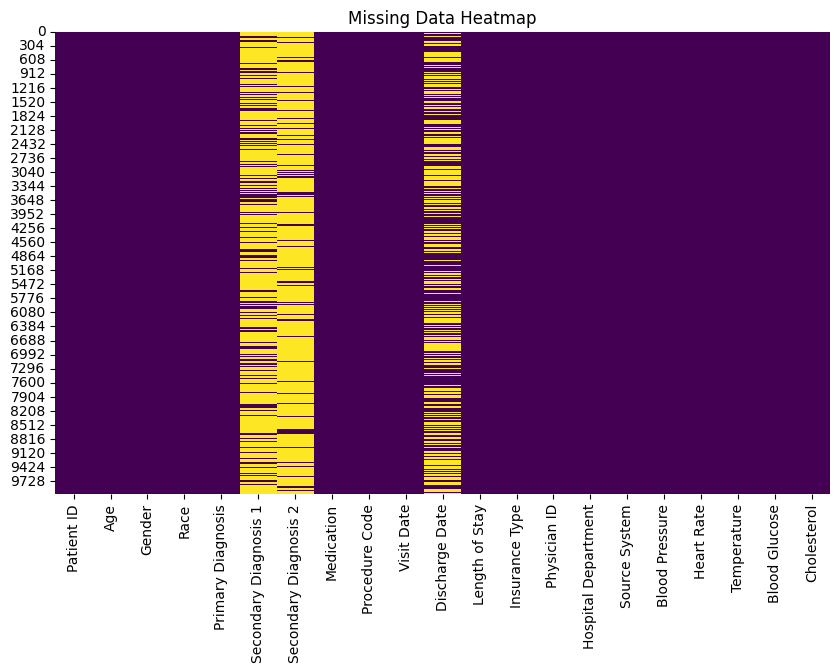

In [28]:
# visualize missing data with a heatmap.
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [29]:
# Check for duplicates
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


In [30]:
# remove duplicate data
df = df.drop_duplicates()

# **Lets explore the numerical features.**

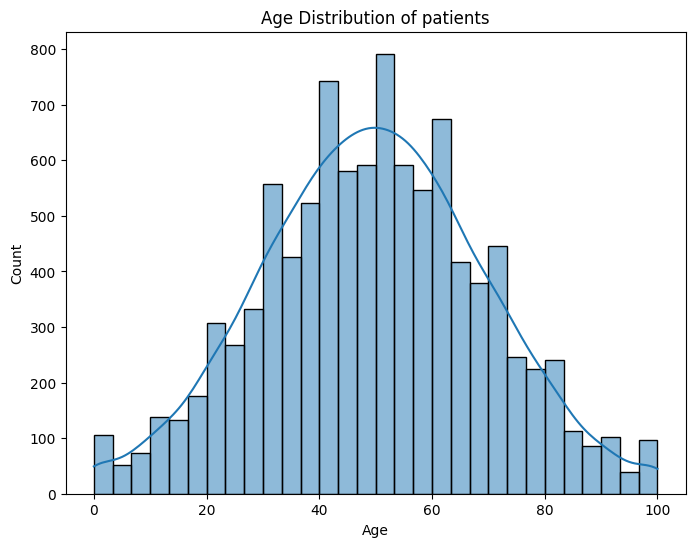

In [31]:
# visualize the Age Distribution of patients.
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of patients')
plt.show()

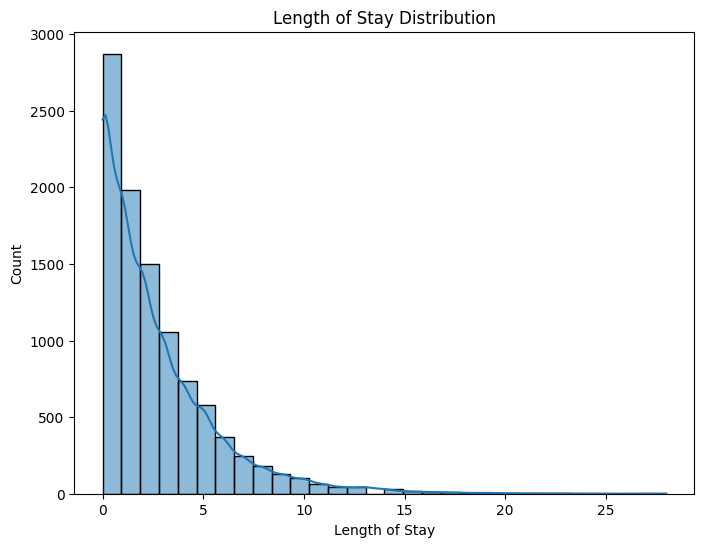

In [32]:
# Length of Stay Distribution.
plt.figure(figsize=(8, 6))
sns.histplot(df['Length of Stay'].dropna(), bins=30, kde=True)
plt.title('Length of Stay Distribution')
plt.show()


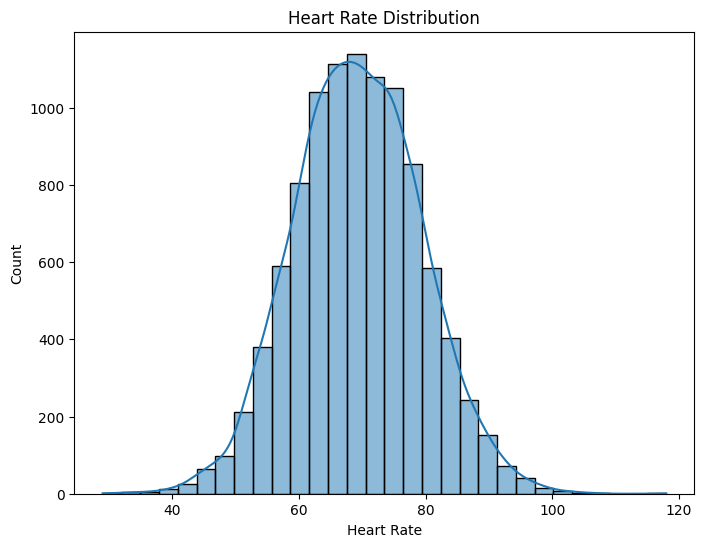

In [33]:
# Heart Rate Distribution.
plt.figure(figsize=(8, 6))
sns.histplot(df['Heart Rate'].dropna(), bins=30, kde=True)
plt.title('Heart Rate Distribution')
plt.show()

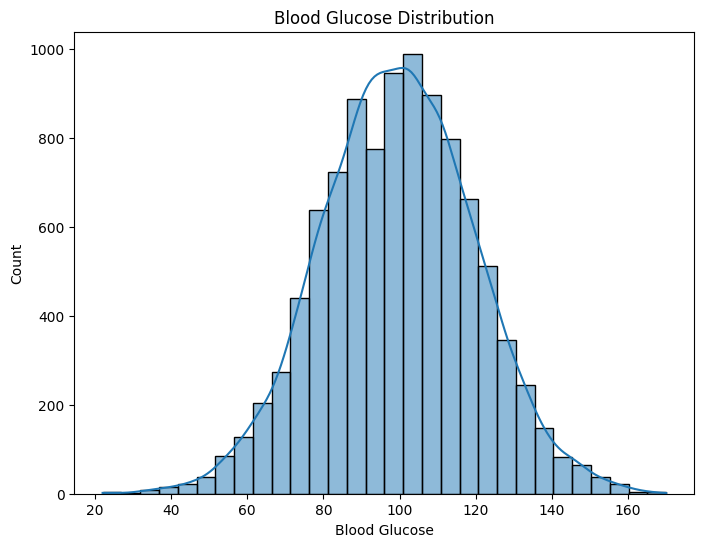

In [34]:
# Blood Glucose Distribution.
plt.figure(figsize=(8, 6))
sns.histplot(df['Blood Glucose'].dropna(), bins=30, kde=True)
plt.title('Blood Glucose Distribution')
plt.show()

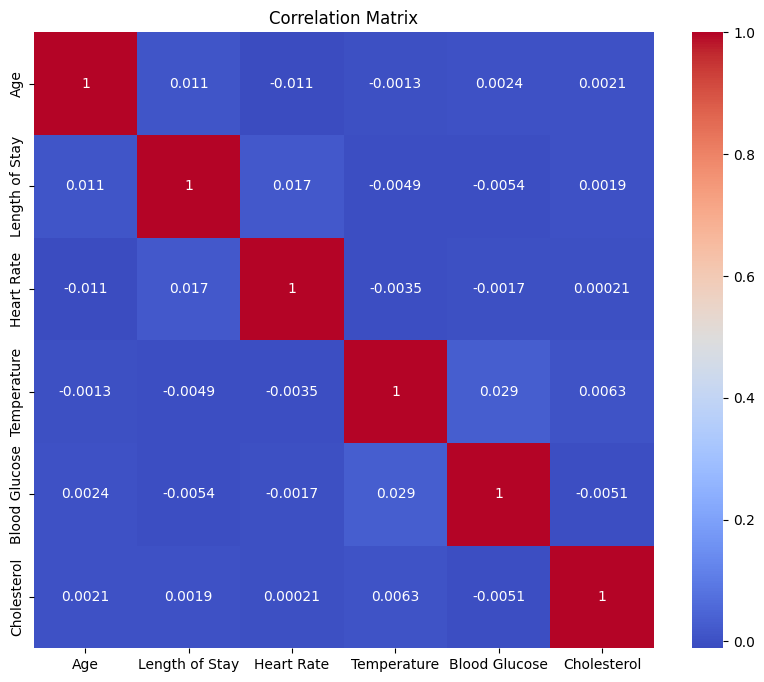

In [35]:
# Correlation matrix numerical features.
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Age', 'Length of Stay', 'Heart Rate', 'Temperature', 'Blood Glucose', 'Cholesterol']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Now we explore the categorical features.**

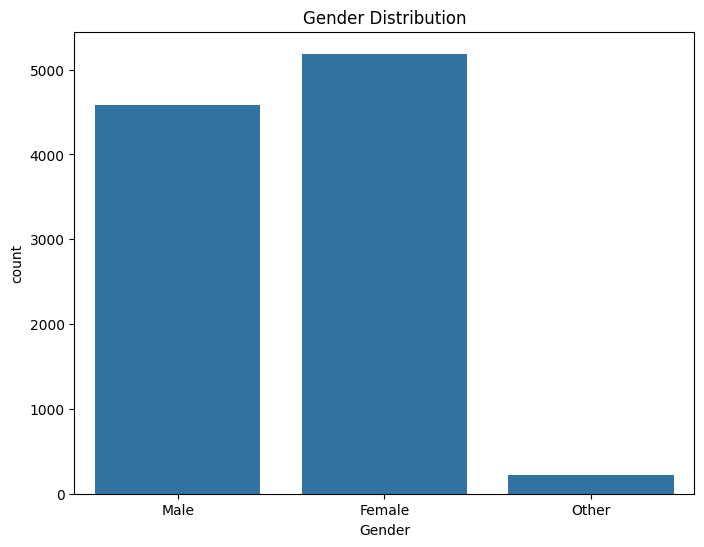

In [36]:
# Gender Distribution.
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

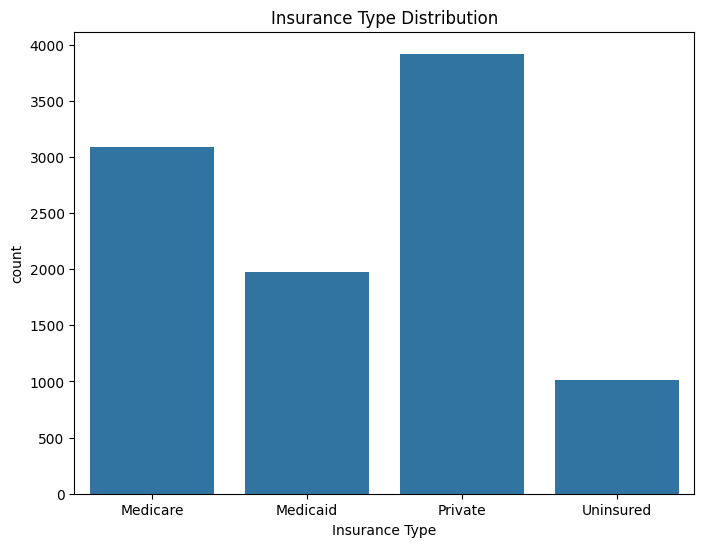

In [38]:
# Insurance Type Distribution.
plt.figure(figsize=(8, 6))
sns.countplot(x='Insurance Type', data=df)
plt.title('Insurance Type Distribution')
plt.show()

In [39]:
# Analyzing typos or inconsistencies in categorical data.
print("\nUnique values in 'Gender' column:")
print(df['Gender'].unique())

print("\nUnique values in 'Race' column:")
print(df['Race'].unique())


Unique values in 'Gender' column:
['Male' 'Female' 'Other']

Unique values in 'Race' column:
['White' 'Other' 'Asian' 'Black or African American' 'Hispanic or Latino']
